# Can you cut the time a Mercedes-Benz spends on the test bench?


The story comes from Kaggle: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

<img src="daimler-mercedes V02.jpg">

In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

The dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

Result is evaluated on the $R^2$ value

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/data_explore.csv')
train.sample(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
321,639,74.00,az,l,n,f,d,i,g,s,...,0,0,0,0,0,0,0,0,0,0
3474,6930,86.73,z,b,ai,c,d,r,a,m,...,0,0,1,0,0,0,0,0,0,0
822,1614,92.53,z,aa,f,g,d,af,g,o,...,1,0,0,0,0,0,0,0,0,0
2299,4597,91.99,f,l,ae,f,d,k,j,f,...,0,0,0,0,0,0,0,0,0,0
3941,7903,92.43,y,r,r,f,d,w,d,o,...,0,0,0,0,0,0,0,0,0,0
3670,7354,88.00,s,z,ai,c,d,v,l,w,...,1,0,0,0,0,0,0,0,0,0
3829,7684,114.47,ak,l,as,f,d,v,i,i,...,0,0,0,0,0,0,0,0,0,0
3456,6898,97.28,o,s,as,g,d,r,d,i,...,1,0,0,0,0,0,0,0,0,0
3567,7138,109.33,ak,l,ap,f,d,r,g,o,...,0,0,0,0,0,0,0,0,0,0
735,1447,105.96,j,aa,ao,d,d,af,i,i,...,0,1,0,0,0,0,0,0,0,0


In [4]:
m, n = train.shape
print("This dataset contains {} records, each records with {} anonymized features".format(m, n-2))

This dataset contains 4209 records, each records with 376 anonymized features


#### Target Variable  

since 'y' is our target, let's look at y first. 

<AxesSubplot:xlabel='Count', ylabel='y'>

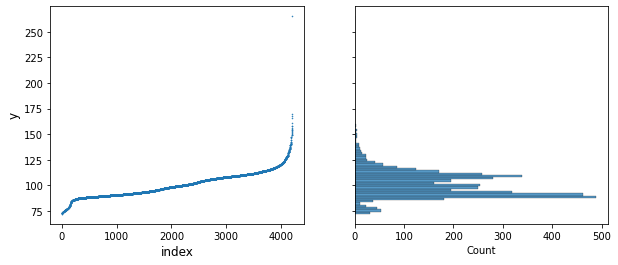

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.scatter(range(train.shape[0]), np.sort(train.y.values), s= 0.3)
ax1.set_xlabel('index', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
sns.histplot(y = train.y, ax=ax2)

# left picture, since dots are tightly connecting each other, almost a solid line, 
# hard to find density, we use right picture to show the density

#### Features

In [6]:
# check datatype
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


So majority of the columns are integers with 8 categorical columns and 1 float column (target variable)

In [7]:
# Let us now check for the missing values.

missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


In [8]:
# check value range of integer and float 

unique_values_dict = {}
for col in train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

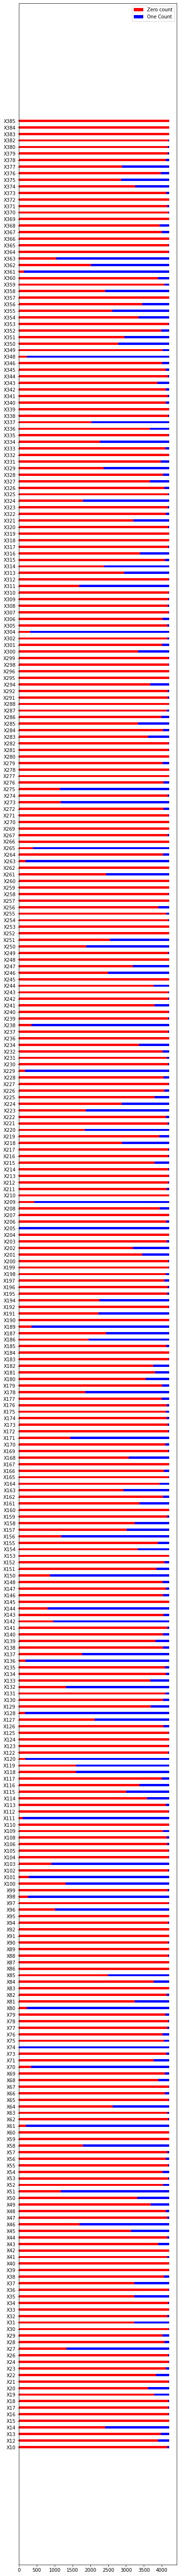

In [9]:
# many of them are binary value, let's check the distribution

zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((train[col]==0).sum())
    one_count_list.append((train[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))



Text(0.5, 1.0, 'Mean of y value across binary variables')

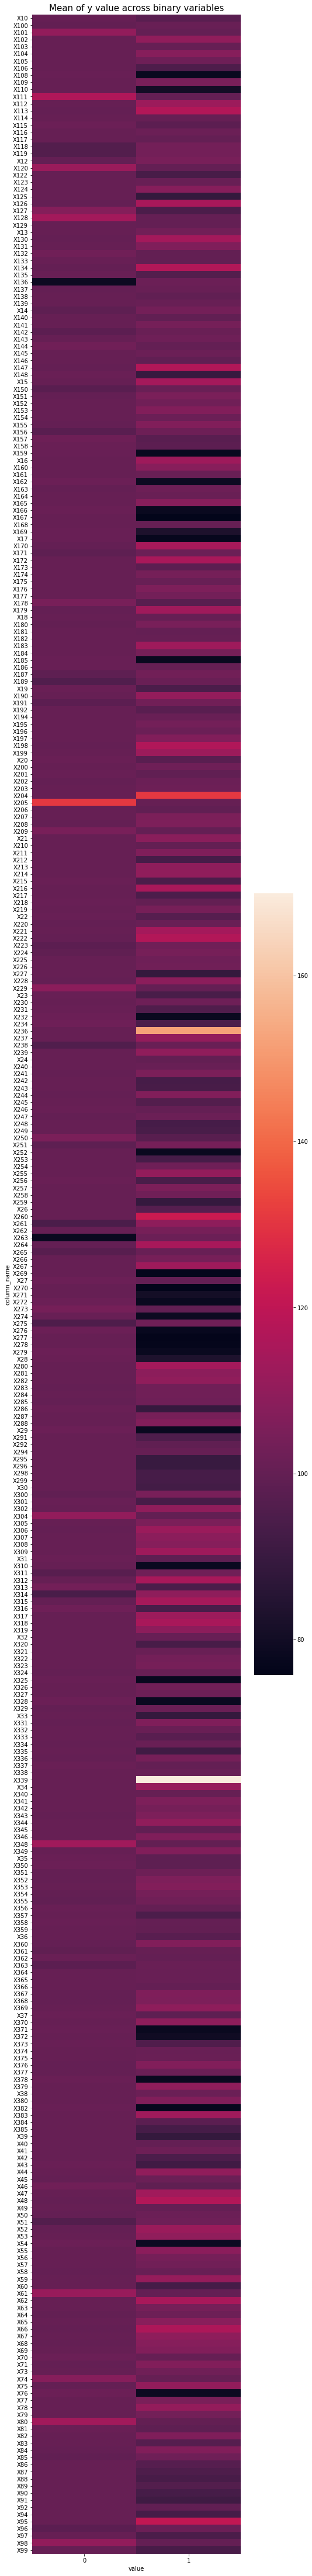

In [10]:
# Now let us check the mean y value in each of the binary variable.

zero_mean_list = []
one_mean_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(train[train[col]==0].y.mean())
    one_mean_list.append(train[train[col]==1].y.mean())

new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)


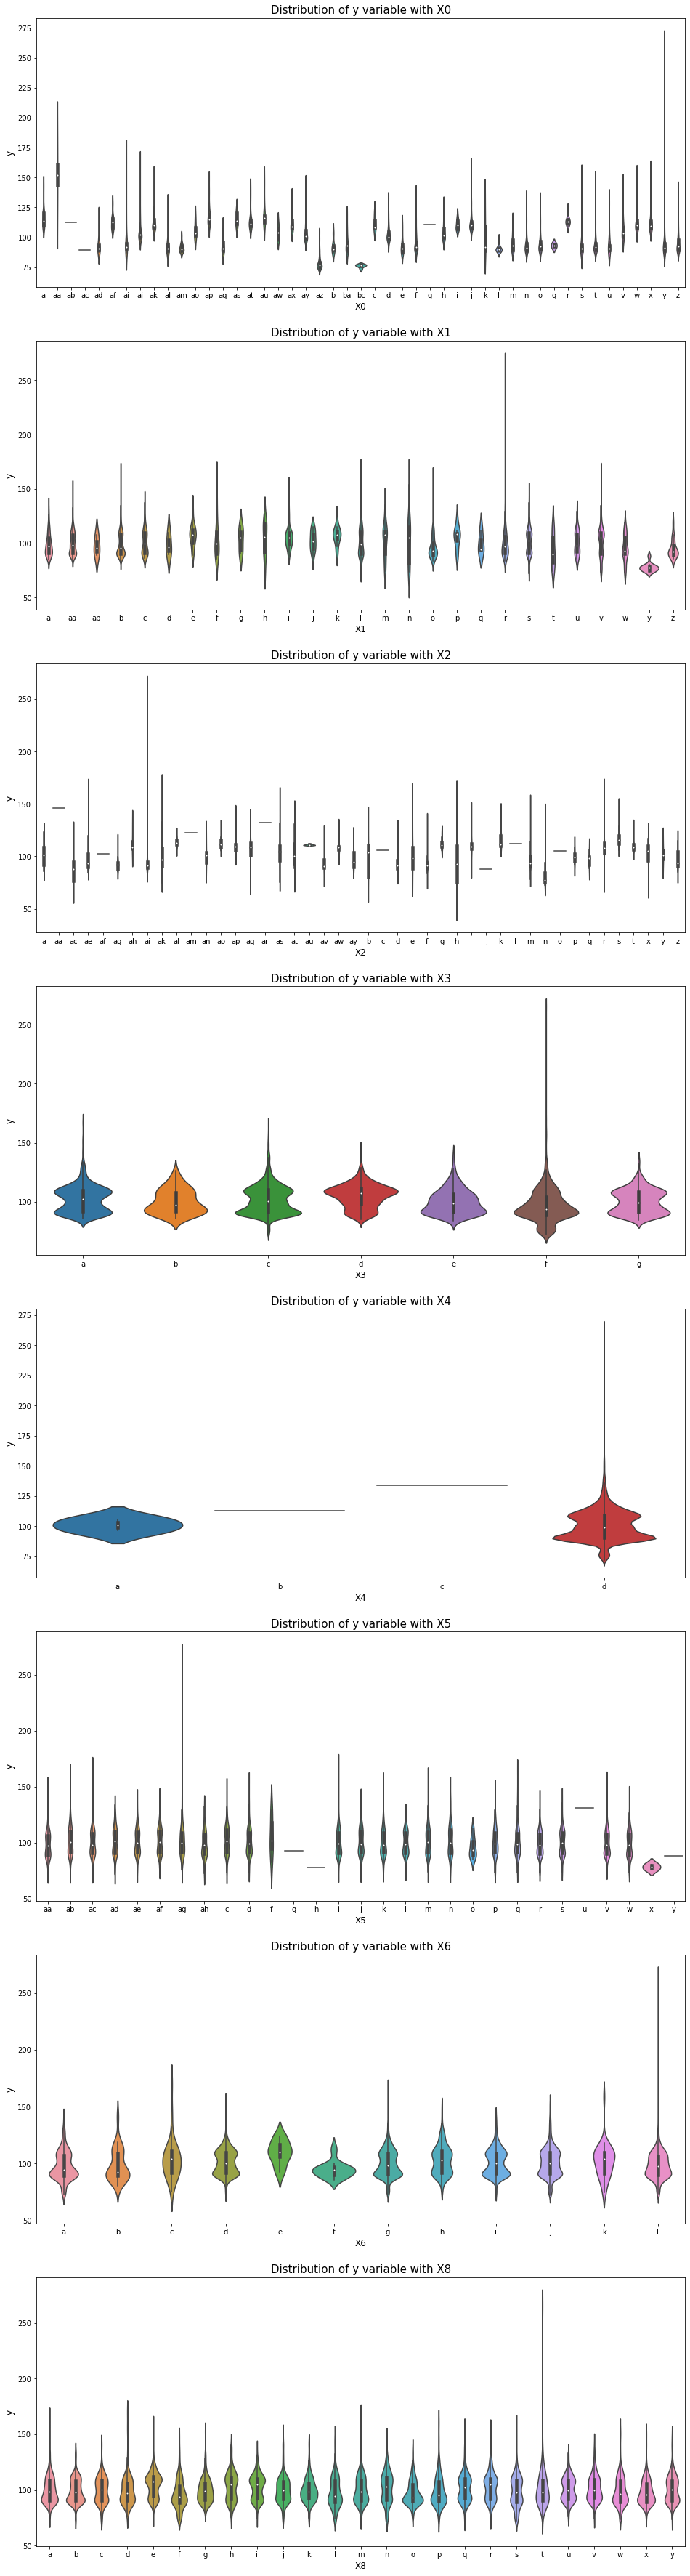

In [11]:
# check categorical value

vars = ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]
n = len(vars)
fig, axes = plt.subplots(n, 1, figsize=(16, n*8))
i = 0
for v in vars:
    col_order = np.sort(train[v].unique()).tolist()

    sns.violinplot(x=v, y='y', data=train, order=col_order, ax=axes[i])
    axes[i].set_xlabel(v, fontsize=12)
    axes[i].set_ylabel('y', fontsize=12)
    axes[i].set_title("Distribution of y variable with "+v, fontsize=15)
    i = i + 1